In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# day file
dy_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/Bikes/day.csv')
dy_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# hour file
hr_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/Bikes/hour.csv')
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
dy_df.shape, hr_df.shape

((731, 16), (17379, 17))

In [6]:
# Check duplicates
print("No. of duplicates in day.csv: ", dy_df.duplicated().sum())
print("No. of duplicates in hour.csv: ", hr_df.duplicated().sum())

# Check missing values
print("No. of missing values in day.csv: ", dy_df.isnull().sum().sum())
print("No. of missing values in hour.csv: ", hr_df.isnull().sum().sum())

No. of duplicates in day.csv:  0
No. of duplicates in hour.csv:  0
No. of missing values in day.csv:  0
No. of missing values in hour.csv:  0


In [7]:
dy_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
dy_df["dteday"] = pd.to_datetime(dy_df["dteday"])
hr_df["dteday"] = pd.to_datetime(hr_df["dteday"])

In [9]:
dy_df.drop(["instant"], axis=1, inplace=True)
hr_df.drop(["dteday","instant"], axis=1, inplace=True)

In [10]:
dy_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hr_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Check Count vs. datetime
import plotly.express as px

fig = px.line(dy_df, x='dteday', y='cnt', title='Count vs. datetime (day.csv)')
fig.show()


In [14]:
# Registerd and Casual vs. datetime (day.csv)
fig = px.line(dy_df, x='dteday', y=['registered', 'casual'], title='Registered and Casual vs. datetime (day.csv)')
fig.show()

In [15]:
# Count vs. Hours (hour.csv)
hours = hr_df.groupby('hr').sum().reset_index()
fig = px.line(hours, x='hr', y='cnt', title='Count vs. datetime (hour.csv)')
fig.show()

In [16]:
# Registerd and Casual vs. Hours (hour.csv)
fig = px.line(hours, x='hr', y=['registered', 'casual'], title='Registered and Casual vs. datetime (hour.csv)')
fig.show()

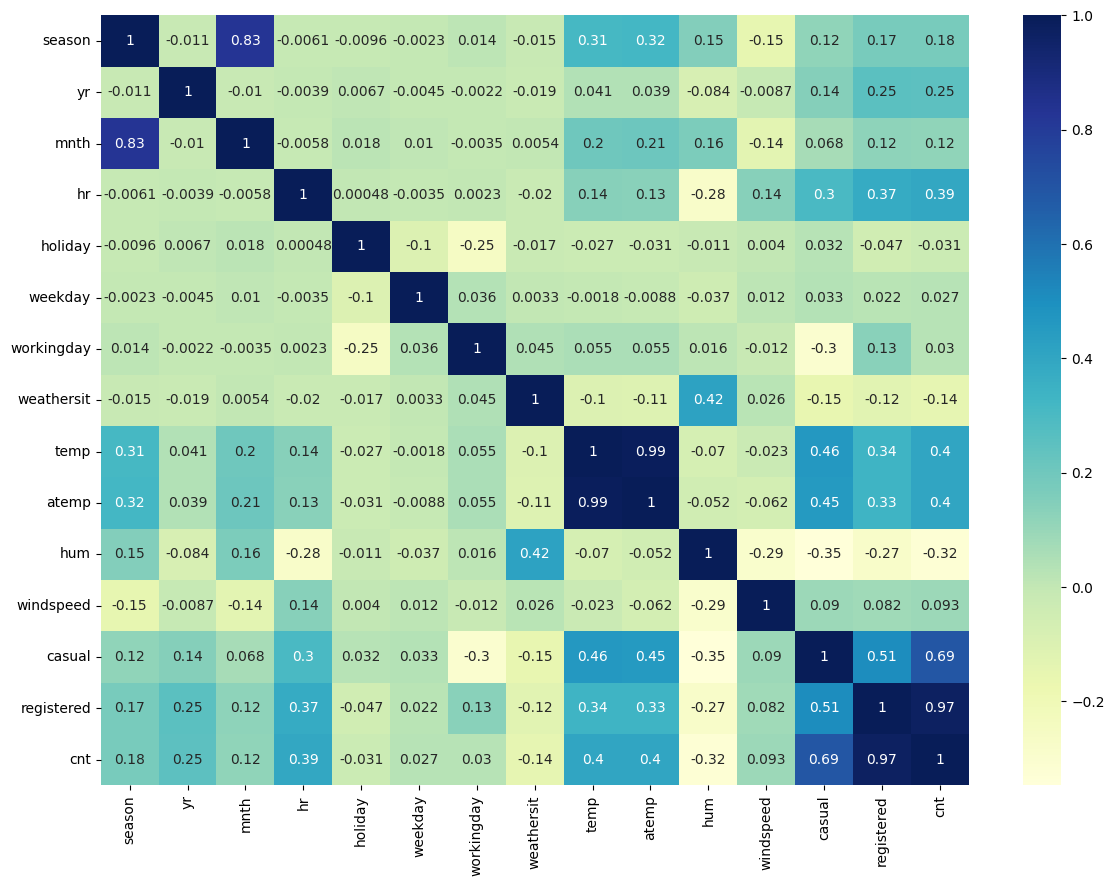

In [17]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = hr_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

 let's start with the following steps (Suggested steps):

1- Play with hr_df only

2- Drop 'cnt' column from the dataset and  our target is to predict two outputs 'casual' and 'registered' columns

3- Drop 'atemp' and keep 'temp' because they are highly correlated

4- Apply quick classic ml models

5- Apply Deep Learning model

# Data Preprocessing

In [18]:
# Take copy
df = hr_df.copy()

# Drop 'cnt', 'temp'
df.drop(['cnt', 'atemp'], axis=1, inplace=True)

# check data
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [19]:
# Numerical columns
num_cols = ['temp', 'hum', 'windspeed'] # All are normalized

# Categorical columns
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'] # To be one-hot encoded


In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(['casual','registered'],axis=1)
y=df[['casual','registered']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)    # Shuffle=False to keep the order of datetime

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 60), (3476, 60), (13903, 2), (3476, 2))

In [22]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=True)
transformer = ColumnTransformer([('one_hot_encoder', ohe, cat_cols)], remainder='passthrough')

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# Apply quick classic ML models

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training Score: ", lr.score(X_train, y_train))
print("Linear Regression Score: ", lr.score(X_test, y_test))

Training Score:  0.6359018898881216
Linear Regression Score:  0.601486071781331


In [27]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Training Score: ", dt.score(X_train, y_train))
print("Testing Score: ", dt.score(X_test, y_test))
# overfitting occured

Training Score:  0.9999838314069003
Testing Score:  0.7450594646543975


In [28]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='linear'))

# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

X_train_arr = X_train.toarray()
X_test_arr = X_test.toarray()


# fit the keras model on the dataset
history = model.fit(X_train_arr, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14833.3389 - mse: 14833.3389 - val_loss: 24357.8027 - val_mse: 24357.8027
Epoch 2/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7064.2974 - mse: 7064.2974 - val_loss: 17311.6758 - val_mse: 17311.6758
Epoch 3/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5489.0063 - mse: 5489.0063 - val_loss: 12841.1064 - val_mse: 12841.1064
Epoch 4/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3942.0308 - mse: 3942.0308 - val_loss: 10040.9365 - val_mse: 10040.9365
Epoch 5/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3227.2883 - mse: 3227.2883 - val_loss: 8851.7637 - val_mse: 8851.7637
Epoch 6/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2878.6470 - mse: 2878.6470 - val_loss: 8326.1650 - val_mse: 8326.1650
Epoch 7/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2630.1184 - mse: 2630.1184 - val_loss: 8150.5400 - val_mse: 8150.5400
Epoch 8/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2574.6016 - mse: 2574.6016 - va

In [29]:
# evaluate the keras model
model.evaluate(X_test_arr, y_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8661.9521 - mse: 8661.9521


[7856.1123046875, 7856.1123046875]

In [32]:
# R2 score
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_arr)
r2_score(y_test, y_pred)
# bad

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.39695966243743896

In [ ]:
# Note
'''
The previous experiment was performing badly, may be due to the number of epochs, neruons, activation functions, etc.
We can change all of these parameters manually to improve the model.
But We will experience new methodolgy in the next part.
'''

In [35]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [42]:
import keras_tuner as kt

def build_model(hp):
    activation = hp.Choice('dense_activation', ['relu', 'sigmoid'])
    initializer = hp.Choice('dense_initializer', ['glorot_uniform', 'normal'])
    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation, kernel_initializer=initializer))
    model.add(Dense(64, activation=activation, kernel_initializer=initializer))
    model.add(Dense(32, activation=activation, kernel_initializer=initializer))
    model.add(Dense(2, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
    return model

tuner = kt.Hyperband(build_model, objective='mse', max_epochs=10, factor=3, directory='my_dir', project_name='intro_to_kt')

tuner.search(X_train_arr, y_train, epochs=10, validation_split=0.2)

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [43]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'dense_activation': 'relu',
 'dense_initializer': 'glorot_uniform',
 'optimizer': 'adam',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [44]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train_arr, y_train, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



348/348 - 3s - 7ms/step - loss: 6717.2432 - mse: 6717.2432 - val_loss: 8417.8838 - val_mse: 8417.8838
Epoch 2/10
348/348 - 1s - 4ms/step - loss: 2022.2946 - mse: 2022.2946 - val_loss: 5740.8970 - val_mse: 5740.8970
Epoch 3/10
348/348 - 2s - 6ms/step - loss: 1102.5432 - mse: 1102.5432 - val_loss: 5455.7427 - val_mse: 5455.7427
Epoch 4/10
348/348 - 1s - 4ms/step - loss: 806.9213 - mse: 806.9213 - val_loss: 4547.4116 - val_mse: 4547.4116
Epoch 5/10
348/348 - 3s - 7ms/step - loss: 714.1157 - mse: 714.1157 - val_loss: 4810.1479 - val_mse: 4810.1479
Epoch 6/10
348/348 - 2s - 6ms/step - loss: 677.9206 - mse: 677.9206 - val_loss: 4242.2490 - val_mse: 4242.2490
Epoch 7/10
348/348 - 1s - 3ms/step - loss: 650.4567 - mse: 650.4567 - val_loss: 4591.2417 - val_mse: 4591.2417
Epoch 8/10
348/348 - 1s - 2ms/step - loss: 622.8700 - mse: 622.8700 - val_loss: 4103.2808 - val_mse: 4103.2808
Epoch 9/10
348/348 - 1s - 4ms/step - loss: 604.5728 - mse: 604.5728 - val_loss: 3463.1423 - val_mse: 3463.1423
Epoch 

In [45]:
model.evaluate(X_test_arr, y_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2811.8140 - mse: 2811.8140


[3305.05029296875, 3305.05029296875]

In [46]:
y_pred = model.predict(X_test_arr)
r2_score(y_test, y_pred)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.7978851795196533